# 4. 주식 데이터의 기술지표 계산하기

## (1) ta(Technical Analysis)  라이브러리란?
- ta 라이브러리는 파이썬에서 사용할 수 있는 금융 데이터 분석을 위한 오픈 소스 라이브러리입니다.
- MACD (이동 평균 수렴/발산), RSI (상대 강도 지수), 볼린저 밴드 등과 같은 다양한 기술적 지표를 포함합니다
- 라이브러리 홈페이지:
    - https://technical-analysis-library-in-python.readthedocs.io/en/latest/
    - https://github.com/bukosabino/ta/tree/master?tab=readme-ov-file#volume

## (2) ta 라이브러리 사용하기

- pandas로 ta 라이브러리 사용하기

In [4]:
import pandas as pd

df = pd.read_csv("../dataset/yfinance_aapl_3year.csv", index_col=0)

# "Date" 열을 datetime 유형으로 변환
df['Date'] = pd.to_datetime(df['Date'])

display(df.head(5))
df.shape

,Date,Close,High,Low,Open,Volume
Price,,,,,,
Ticker,NaT,AAPL,AAPL,AAPL,AAPL,AAPL
0,2023-01-03,123.21121215820312,128.95456111650307,122.3245864348614,128.34378035287284,112117500
1,2023-01-04,124.48204040527344,126.7478608503369,123.22106494631889,125.00416235162118,89113600
2,2023-01-05,123.16192626953125,125.87105525957746,122.9057958492687,125.24056765953802,80962700
3,2023-01-06,127.69357299804688,128.3536136037993,123.03387482286254,124.13723200436364,87754700


(754, 6)

In [ ]:
# !pip install ta
import ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### 1) MACD(Moving Average Convergence/Divergence)
- MACD란?
    - 거래자와 분석가들이 추세와 모멘텀을 판단하기 위해 사용하는 기술적 지표입니다.
    - MACD는 기본적으로 두 지수 이동 평균 (Exponential Moving Averages, EMAs) 간의 관계를 통해 시장의 강도, 방향, 모멘텀 등을 파악할 수 있습니다.
- MACD 지표
    - MACD Line:
        - 일반적으로 12일 EMA와 26일 EMA의 차이로 계산됩니다.
    - MACD Signal Line:
        - MACD Line의 9일 EMA로 계산됩니다
- MACD 해석
    - **<span style="color: green">매수 신호 (Bullish Signal)</span>**:
        - MACD Line이 Signal Line을 아래에서 위로 교차하는 시점이며. 가격이 상승할 가능성을 의미합니다.
    - **<span style="color: red">매도 신호 (Bearish Signal)</span>**:
        - MACD Line이 Signal Line을 위에서 아래로 교차하는 시점이며, 가격이 하락할 가능성을 의미합니다.

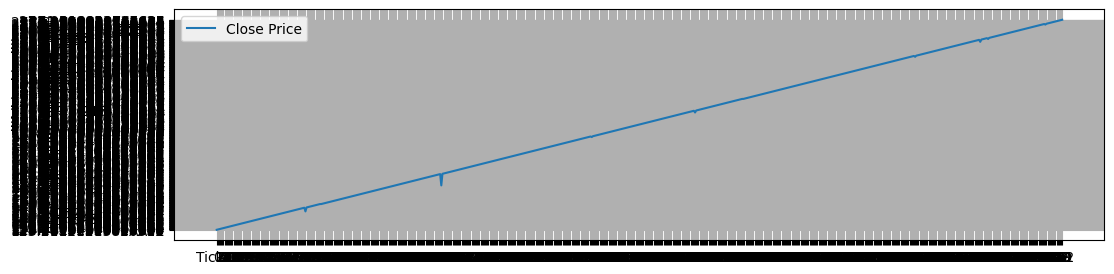

In [8]:
plt.figure(figsize=(12,3))
plt.plot(df['Close'], label='Close Price')
plt.legend()
plt.grid()
plt.show()

In [12]:
print(df["Close"].head(10))
print(df["Close"].dtype)

Price
Ticker                  AAPL
0         123.21121215820312
1         124.48204040527344
2         123.16192626953125
3         127.69357299804688
4         128.21571350097656
5         128.78707885742188
6         131.50607299804688
7         131.42727661132812
8         132.75718688964844
Name: Close, dtype: object
object


In [ ]:
# 문자열로 된 종가 데이터를 숫자형으로 변환
df["Close"] = pd.to_numeric(df["Close"], errors='coerce')
# 종가 기준 MACD 계산하기
macd        = ta.trend.macd(df["Close"])
macd_signal = ta.trend.macd_signal(df["Close"])
macd_diff   = ta.trend.macd_diff(df["Close"])

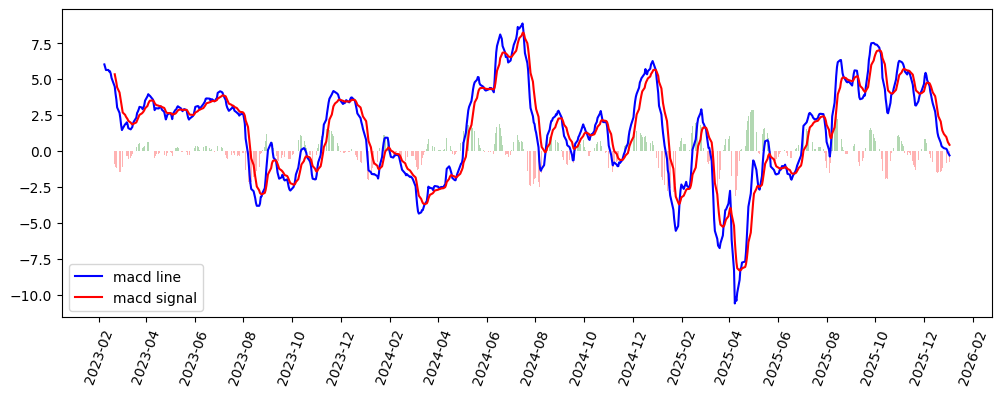

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df["Date"], macd, label="macd line", color="blue")
ax.plot(df["Date"], macd_signal, label="macd signal", color="red")

# 매수신호는 초록색, 매도신호는 빨간색으로 표시
colors = ['green' if val >= 0 else 'red' for val in macd_diff]
ax.bar(df["Date"],  macd_diff, color=colors, alpha=0.3)

# x축 날짜 표시를 2달 주기로 변경
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=70)

plt.legend()
plt.show()

### 2) RSI(Relative Strength Index, 상대 강도 지수)
- RSI란?
    - RSI는 주식 등의 금융 자산에서 과매수나 과매도 상태를 판단하기 위해 사용되는 기술적 분석 지표입니다. 
    - 최근 가격 변동을 측정하여 현재의 가격 추세가 얼마나 강력한지를 계산할 수 있습니다.
- RSI 계산 방법:
    - 이익일 평균(Average Gain) & 손실일 평균(Average Loss): 특정 기간(보통 14일) 동안의 가격 상승분과 가격하락분의 평균을 구합니다.
    - RS (Relative Strength): 이익일 평균을 손실일 평균으로 나눕니다.
    - RSI 계산: RSI는 다음 공식을 사용하여 계산됩니다

$$ RSI = 100 - \left(\frac{100}{1 + RS}\right) $$


- RSI의 해석
    - **<span style="color: green">매수 신호 (Bullish Signal)</span>**:
        - 30 이하: 자산이 과매도 상태일 가능성이 있어 가격이 상승할 수 있습니다.
    - **<span style="color: red">매도 신호 (Bearish Signal)</span>**:
        - 70 이상: 자산이 과매수 상태일 가능성이 있어 가격이 하락할 수 있습니다.

In [28]:
import pandas as pd
import ta
import matplotlib.pyplot as plt
df = pd.read_csv("../dataset/yfinance_aapl_3year.csv", index_col=0)

# "Date" 열을 datetime 유형으로 변환
df['Date'] = pd.to_datetime(df['Date'])

display(df.head(5))
df.shape

,Date,Close,High,Low,Open,Volume
Price,,,,,,
Ticker,NaT,AAPL,AAPL,AAPL,AAPL,AAPL
0,2023-01-03,123.21121215820312,128.95456111650307,122.3245864348614,128.34378035287284,112117500
1,2023-01-04,124.48204040527344,126.7478608503369,123.22106494631889,125.00416235162118,89113600
2,2023-01-05,123.16192626953125,125.87105525957746,122.9057958492687,125.24056765953802,80962700
3,2023-01-06,127.69357299804688,128.3536136037993,123.03387482286254,124.13723200436364,87754700


(754, 6)

In [29]:
# 문자열로 된 종가 데이터를 숫자형으로 변환
df["Close"] = pd.to_numeric(df["Close"], errors='coerce')
# 종가 기준 RSI 계산하기
rsi = ta.momentum.rsi(df["Close"])


In [30]:
rsi.head()

Price
Ticker   NaN
0        NaN
1        NaN
2        NaN
3        NaN
Name: rsi, dtype: float64

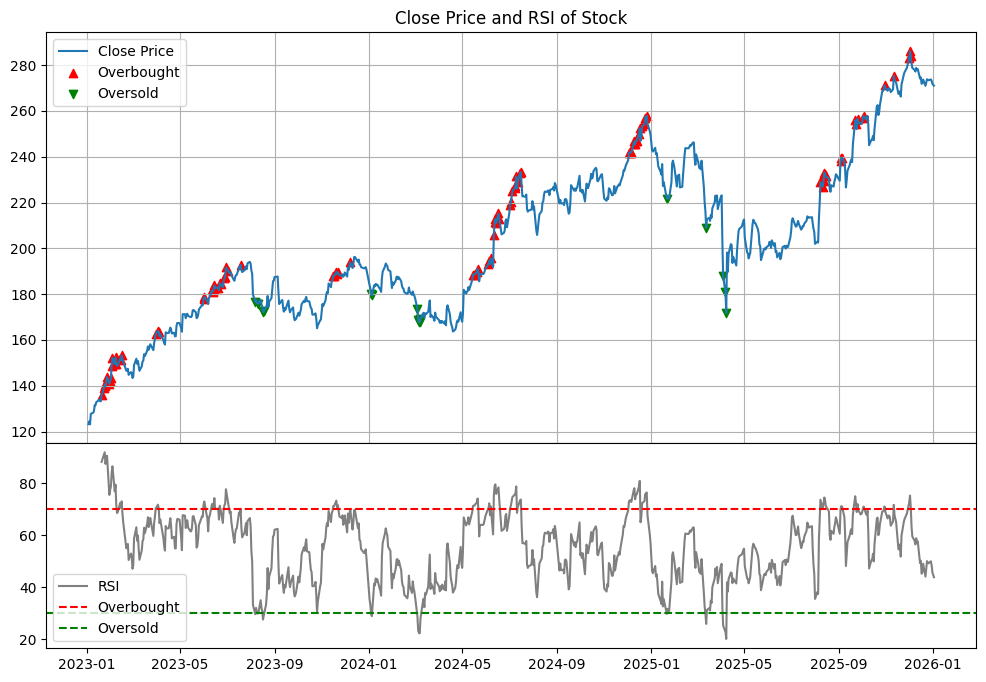

In [31]:
df["RSI"] = rsi
df = df.set_index("Date")


# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})  # sharex 파라미터 사용

# 주가 그래프 생성
ax1.plot(df.index, df['Close'], label='Close Price')

overbought_dates = df[df['RSI'] > 70].index
oversold_dates = df[df['RSI'] < 30].index
# 매수신호는 초록색, 매도신호는 빨간색으로 표시
ax1.scatter(overbought_dates, df.loc[overbought_dates, 'Close'], color='red', label='Overbought', marker='^')
ax1.scatter(oversold_dates, df.loc[oversold_dates, 'Close'], color='green', label='Oversold', marker='v')

ax1.set_title('Close Price and RSI of Stock')
ax1.grid()
ax1.legend()
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)   # x축 라벨 숨기기

# RSI 그래프 생성
ax2.plot(df.index, rsi, label='RSI', color='gray')
ax2.axhline(70, color='red', linestyle='--', label='Overbought')
ax2.axhline(30, color='green', linestyle='--', label='Oversold')
ax2.legend()

plt.subplots_adjust(hspace=0) 

# 그래프 표시